In [5]:
import numpy as np
import scipy.sparse as sparse

import sys
from os import listdir
from itertools import product


In [191]:
import input_output

# Read in command line arguments
chrom = '22'
m = 5
variant_dir = '../phased_ihart_LCL/variants'

ped_file = '../data/160826.ped.LCL.ped'
data_dir = '../split_gen_miss'
batch_size = None
batch_num = None
batch_offset = None

# set up filenames
sample_file = '%s/chr.%s.gen.samples.txt' % (data_dir, chrom)
coord_file = '%s/chr.%s.gen.coordinates.npy' % (data_dir,  chrom)
gen_files = sorted([f for f in listdir(data_dir) if ('chr.%s' % chrom) in f and 'gen.npz' in f])

families_of_this_size = dict(pull_families(sample_file, ped_file, m, batch_size, batch_offset))
print(families_of_this_size)
wgs_data = input_output.WGSData(data_dir, gen_files, coord_file, sample_file, chrom)

families with sequence data 18
families of size 5: 4
families pulled 5: 4
{('AU1043', 'AU1043202', 'AU1043201'): ['AU1043202', 'AU1043201', 'AU1043301', 'AU1043302', 'AU1043303'], ('AU3702', 'AU3702202', 'AU3702201'): ['AU3702202', 'AU3702201', 'AU3702308', 'AU3702306', 'AU3702309'], ('AU3913', 'AU3913202', 'AU3913201'): ['AU3913202', 'AU3913201', 'AU3913301', 'AU3913303', 'AU3913304'], ('AU3839', 'AU3839202', 'AU3839201'): ['AU3839202', 'AU3839201', 'AU3839302', 'AU3839304', 'AU3839301']}
chrom shape only SNPs (1004649,)


In [175]:
variant_data = []
families = []
for f in listdir(variant_dir):
    if f.endswith('variants.npz'):
        print(f)
        variant_data.append(sparse.load_npz('%s/%s' % (variant_dir, f)))
        families.append(tuple(f.split('.')[2:5]))


chr.22.AU2410.AU2410202.AU2410201.variants.npz
chr.22.AU3051.AU3051202.AU3051201.variants.npz
chr.22.AU3154.AU3154202.AU3154201.variants.npz
chr.22.AU1860.AU1860202.AU1860201.variants.npz
chr.22.AU2911.AU2911202.AU2911201.variants.npz
chr.22.AU3053.AU3053202.AU3053201.variants.npz
chr.22.AU0965.AU0965202.AU0965201.variants.npz
chr.22.AU3846.AU3846202.AU3846201.variants.npz
chr.22.AU3761.AU3761202.AU3761201.variants.npz
chr.22.AU3713.AU3713202.AU3713201.variants.npz
chr.22.AU3646.AU3646202.AU3646201.variants.npz
chr.22.AU4235.AU4235202.AU4235201.variants.npz
chr.22.AU1308.AU1308202.AU1308201.variants.npz


In [176]:
all_together = sparse.vstack(variant_data)
print(all_together.shape)

has_variant = np.unique(all_together.nonzero()[1])

all_together = all_together[:, has_variant].A
print(all_together.shape)

(52, 51304566)
(52, 579230)


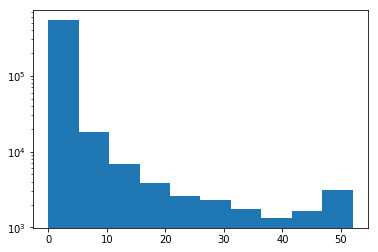

In [177]:
import matplotlib.pyplot as plt

a = np.sum(all_together==-1, axis=0)
plt.hist(a, log=True)
plt.show()

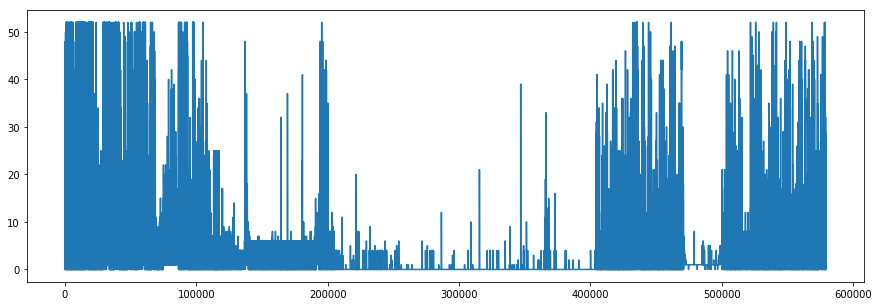

In [178]:
plt.figure(figsize=(15, 5))
plt.plot(a)
plt.show()

In [179]:
print(np.sum(a>40)/a.shape[0])

0.008418072268356266


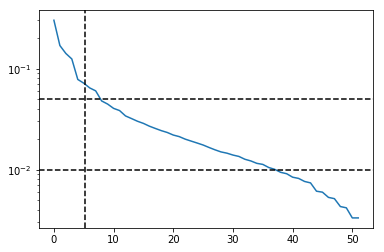

In [180]:
b = []
for i in range(all_together.shape[0]):
    b.append(np.sum(a>i)/a.shape[0])
plt.semilogy(b)
plt.axhline(0.05, color='black', linestyle='--')
plt.axhline(0.01, color='black', linestyle='--')
plt.axvline(all_together.shape[0]/10, color='black', linestyle='--')
plt.show()

In [181]:
print(variant_data[0].shape)

(4, 51304566)


The above is focused on the ancestral chromosomes, now let's look at individuals.

In [182]:
blame_data = []
for f in listdir(variant_dir):
    if f.endswith('blame.npz'):
        print(f)
        blame_data.append(sparse.load_npz('%s/%s' % (variant_dir, f)))


chr.22.AU1308.AU1308202.AU1308201.blame.npz
chr.22.AU3761.AU3761202.AU3761201.blame.npz
chr.22.AU3713.AU3713202.AU3713201.blame.npz
chr.22.AU3154.AU3154202.AU3154201.blame.npz
chr.22.AU3646.AU3646202.AU3646201.blame.npz
chr.22.AU1860.AU1860202.AU1860201.blame.npz
chr.22.AU2410.AU2410202.AU2410201.blame.npz
chr.22.AU3051.AU3051202.AU3051201.blame.npz
chr.22.AU3053.AU3053202.AU3053201.blame.npz
chr.22.AU3846.AU3846202.AU3846201.blame.npz
chr.22.AU2911.AU2911202.AU2911201.blame.npz
chr.22.AU4235.AU4235202.AU4235201.blame.npz
chr.22.AU0965.AU0965202.AU0965201.blame.npz


In [183]:
print(blame_data[0].shape)
print(blame_data[1].shape)

(5, 51304566)
(4, 51304566)


In [184]:
fracs = [1, 0.5, 1/3, 2/3, 0.25, 0.75, 0.2, 0.4, 0.6, 0.8]
for frac in fracs:
    print('%0.2f' % frac, np.sum(blame_data[0]==frac))

1.00 5092
0.50 4673
0.33 1158
0.67 290
0.25 2
0.75 2
0.20 0
0.40 0
0.60 0
0.80 0


In [189]:
ind = 'AU1860301_LCL'
fams = [x for x, y in families_of_this_size.items() if ind in y]
print(fams)
inds = families_of_this_size[fams[0]] + [ind + '_LCL']
print(inds)
family_genotypes, family_snp_positions, mult_factor = wgs_data.pull_data_for_individuals(inds)


[]


IndexError: list index out of range

In [115]:
from input_output import chrom_lengths, convert_to_csr

chrom_length = chrom_lengths[chrom]
csr_genotypes = convert_to_csr(family_genotypes, family_snp_positions, mult_factor, chrom_length)

In [116]:
print(families)
blame = blame_data[families.index(fams[0])]
print(csr_genotypes.shape)

[('AU1411', 'AU1411202', 'AU1411201'), ('AU2410', 'AU2410202', 'AU2410201'), ('AU0705', 'AU070501', 'AU070502'), ('AU0777', 'AU077701', 'AU077702'), ('AU1773', 'AU1773202', 'AU1773201'), ('AU0350', 'AU035001', 'AU035002'), ('AU0793', 'AU079301', 'AU079302'), ('AU0782', 'AU0782202', 'AU0782201'), ('AU0157', 'AU015701', 'AU015702'), ('AU0222', 'AU022201', 'AU022202'), ('AU0250', 'AU025001', 'AU025002'), ('AU0677', 'AU067701', 'AU067702'), ('AU0828', 'AU082801', 'AU082802'), ('AU0025', 'AU002501', 'AU002502'), ('AU1533', 'AU1533202', 'AU1533201'), ('AU1951', 'AU1951202', 'AU1951201'), ('AU0845', 'AU084501', 'AU084502'), ('AU0150', 'AU015001', 'AU015002'), ('AU1665', 'AU1665202', 'AU1665201'), ('AU0794', 'AU079401', 'AU079402'), ('AU3787', 'AU3787202', 'AU3787201'), ('AU3051', 'AU3051202', 'AU3051201'), ('AU1601', 'AU1601202', 'AU1601201'), ('AU0325', 'AU032501', 'AU032502'), ('AU1563', 'AU1563202', 'AU1563201'), ('AU0048', 'AU004801', 'AU004802'), ('AU0994', 'AU0994202', 'AU0994201'), ('A

ValueError: ('AU3053', 'AU3053202', 'AU3053201') is not in list

In [101]:
from collections import Counter
for frac in fracs:
    print('%0.2f' % frac, np.unique(np.ravel(csr_genotypes[blame==frac]), return_counts=True))

1.00 (array([-1,  0,  1,  2], dtype=int8), array([  79, 2703, 1367,  113]))
0.50 (array([-1,  0,  1,  2], dtype=int8), array([ 128, 4605, 2042,  235]))
0.33 (array([-1,  0,  1,  2], dtype=int8), array([  53, 1960,  651,   67]))
0.67 (array([-1,  0,  1,  2], dtype=int8), array([ 5, 29, 20,  2]))
0.25 (array([-1,  0,  1,  2], dtype=int8), array([  13,  877, 1322,   53]))
0.75 (array([-1,  0,  1], dtype=int8), array([2, 8, 7]))
0.20 (array([-1,  0,  1,  2], dtype=int8), array([2, 4, 7, 5]))
0.40 (array([-1,  0,  1,  2], dtype=int8), array([1, 1, 3, 1]))
0.60 (array([<1x0 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>], dtype=object), array([1]))
0.80 (array([<1x0 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>], dtype=object), array([1]))
